<a href="https://colab.research.google.com/github/ShyamGanesh5/False-news-dectection-/blob/main/IPS_false_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
ifind_data = pd.read_excel("/IFND (1).xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/IFND (1).xlsx'

In [ ]:
ifind_data.head()

In [ ]:
ifind_data.rename(columns={'Statement': 'text', 'Label': 'target','Date':'date'}, inplace=True)

In [ ]:
ifind_data['target'] = ifind_data['target'].astype(str)
ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)

In [ ]:
ifind_data['target'].value_counts()

In [ ]:
ifind_data.head()

In [ ]:
print(ifind_data["target"].value_counts())
g1 = plt.pie(ifind_data["target"].value_counts().values,explode=[0,0],labels=ifind_data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()


NameError: name 'ifind_data' is not defined

Category
GOVERNMENT    10923
VIOLENCE      10578
COVID-19       8710
POLITICS       8670
ELECTION       8396
TERROR         4384
MISLEADING     4059
TRAD            976
MISLEADIND       18
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

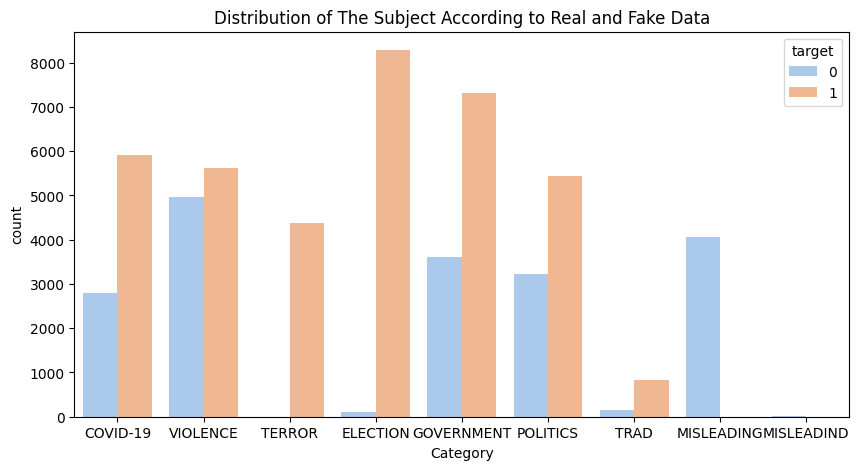

In [ ]:
print(ifind_data.Category.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="Category",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

Web
TRIBUNEINDIA        11832
AUGMENT             11321
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

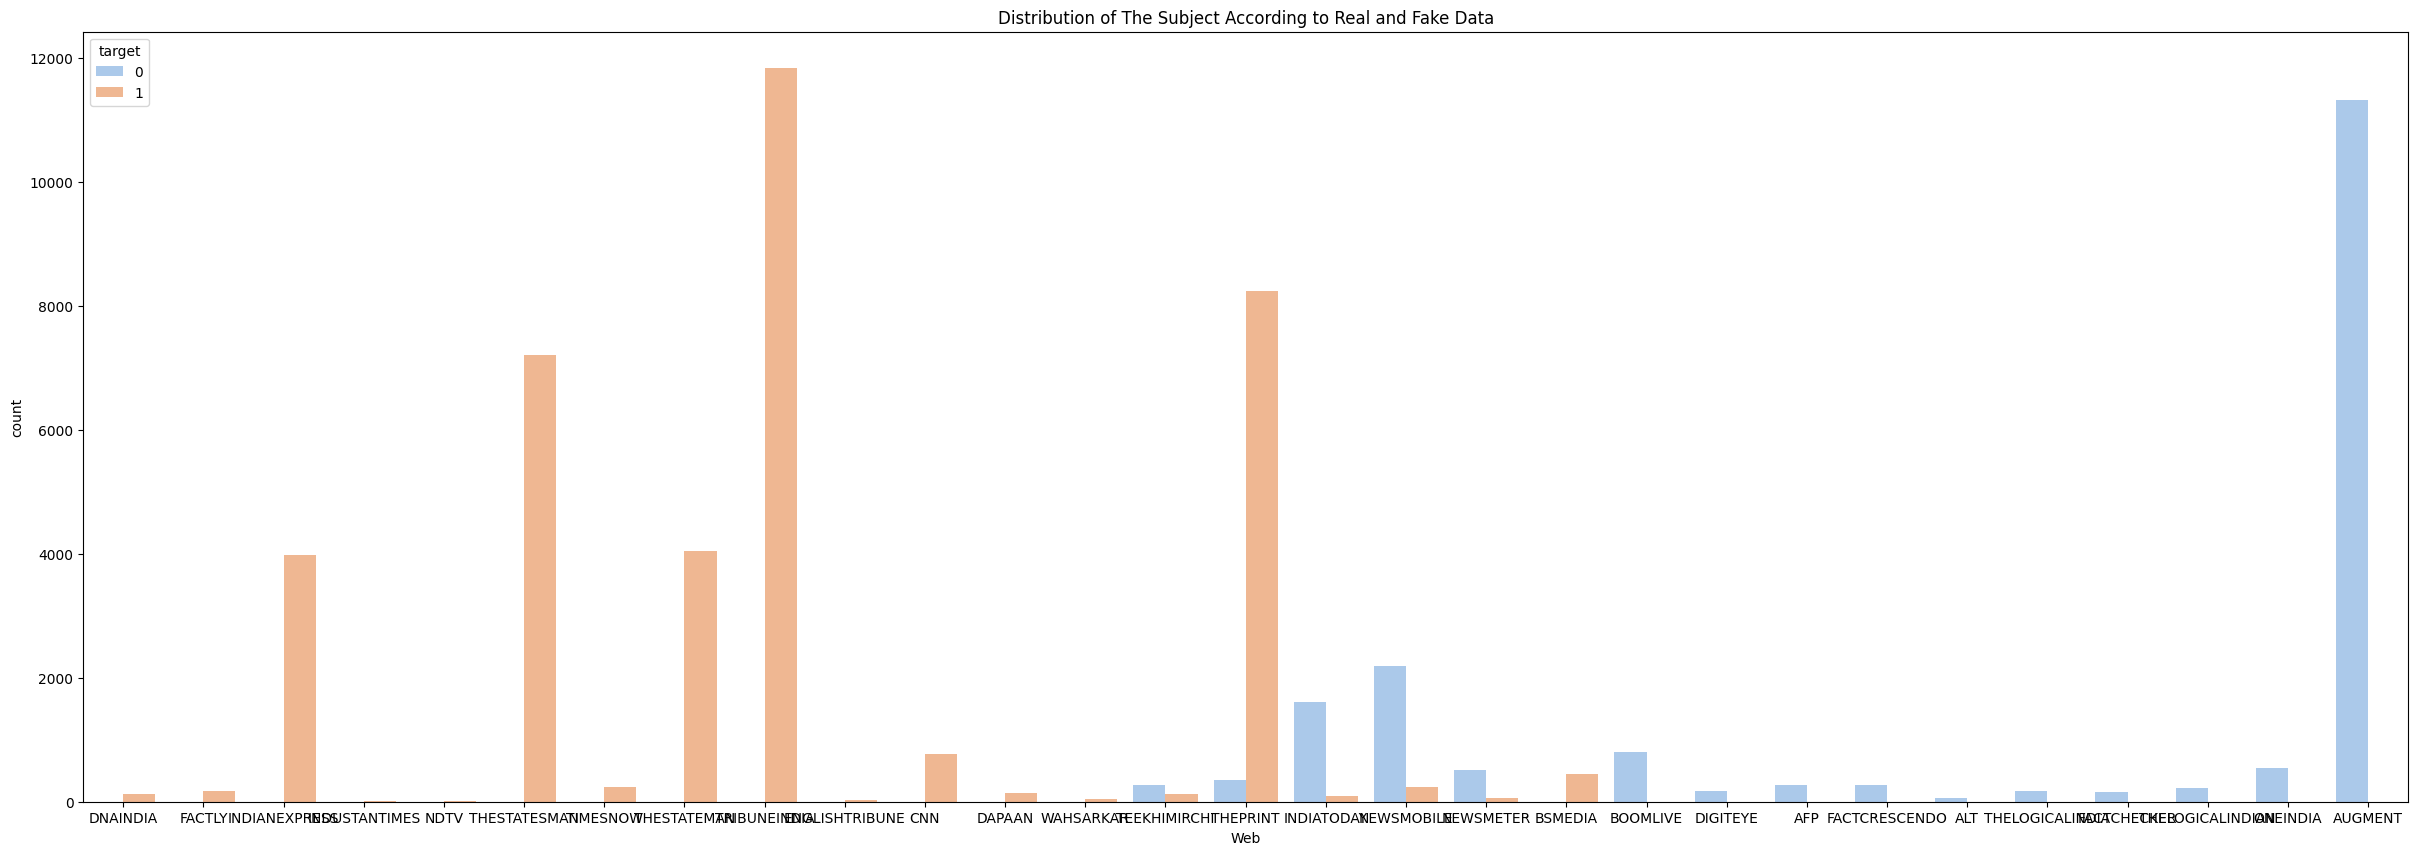

In [ ]:
print(ifind_data.Web.value_counts())
plt.figure(figsize=(30, 10))

ax = sns.countplot(x="Web",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [ ]:
ifind_data.groupby(['Web','target'])['id'].count()

Web               target
AFP               0           267
ALT               0            59
AUGMENT           0         11321
BOOMLIVE          0           806
BSMEDIA           1           449
CNN               1           778
DAPAAN            1           136
DIGITEYE          0           175
DNAINDIA          1           121
ENGLISHTRIBUNE    1            21
FACTCHECKER       0           163
FACTCRESCENDO     0           272
FACTLY            1           174
INDIANEXPRESS     1          3983
INDIATODAY        0          1606
                  1            92
INDUSTANTIMES     1            15
NDTV              1             8
NEWSMETER         0           506
                  1            66
NEWSMOBILE        0          2190
                  1           232
ONEINDIA          0           549
TEEKHIMIRCHI      0           262
                  1           125
THELOGICALINDIA   0           173
THELOGICALINDIAN  0           221
THEPRINT          0           344
                  1    

In [ ]:
data = ifind_data[['text','target']].copy()

In [ ]:
data.head()

,text,target
0,"WHO praises India's Aarogya Setu app, says it ...",1
1,"In Delhi, Deputy US Secretary of State Stephen...",1
2,LAC tensions: China's strategy behind delibera...,1
3,India has signed 250 documents on Space cooper...,1
4,Tamil Nadu chief minister's mother passes away...,1


In [ ]:
first_text = data.text[10]
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [ ]:
#Removal of html content
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [ ]:
#removal of punctuation marks and special characters
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'amid stubble burning  delhi s air quality deteriorates to  very poor '

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#tokenization and stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text

['amid',
 'stubble',
 'burning',
 'delhi',
 'air',
 'quality',
 'deteriorates',
 'poor']

In [ ]:
#lemmatization
import nltk
nltk.download('omw-1.4')
first_text = "Amid stubble burning, Delhi's air quality deteriorates to 'very poor "
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text.split()]
first_text = " ".join(first_text)
first_text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"Amid stubble burning, Delhi's air quality deteriorates to 'very poor"

In [ ]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [ ]:
#Removal of stopwords
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    #lemma = nltk.WordNetLemmatizer()

    final_text = [word for word in text if word not in stopwords.words('english')]
    return " ".join(final_text)

In [ ]:
def remove_stopwords(text):
    final_text = []
    final_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(final_text)

In [ ]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [ ]:
data['text']=data['text'].apply(remove_html)
data['text']=data['text'].apply(remove_punctuations)
data['text']=data['text'].apply(remove_characters)
data['text']=data['text'].apply(remove_stopwords)

In [ ]:
data.head()

,text,target
0,praises India Aarogya Setu app says helped ide...,1
1,Delhi Deputy US Secretary State Stephen Biegun...,1
2,LAC tensions China strategy behind deliberatel...,1
3,India signed documents Space cooperation count...,1
4,Tamil Nadu chief minister mother passes away,1


In [ ]:
data.tail()

,text,target
56709,Fact Check Bruce Lee playing ping pong Nunchaku,0
56710,Fact Check Japan construct bridge hours,0
56711,Fact Check Viral video Mexico earthquake years...,0
56712,Fact Check Ballet performance Chinese couple g...,0
56713,Fact Check little boy crossing Jordan alone lo...,0


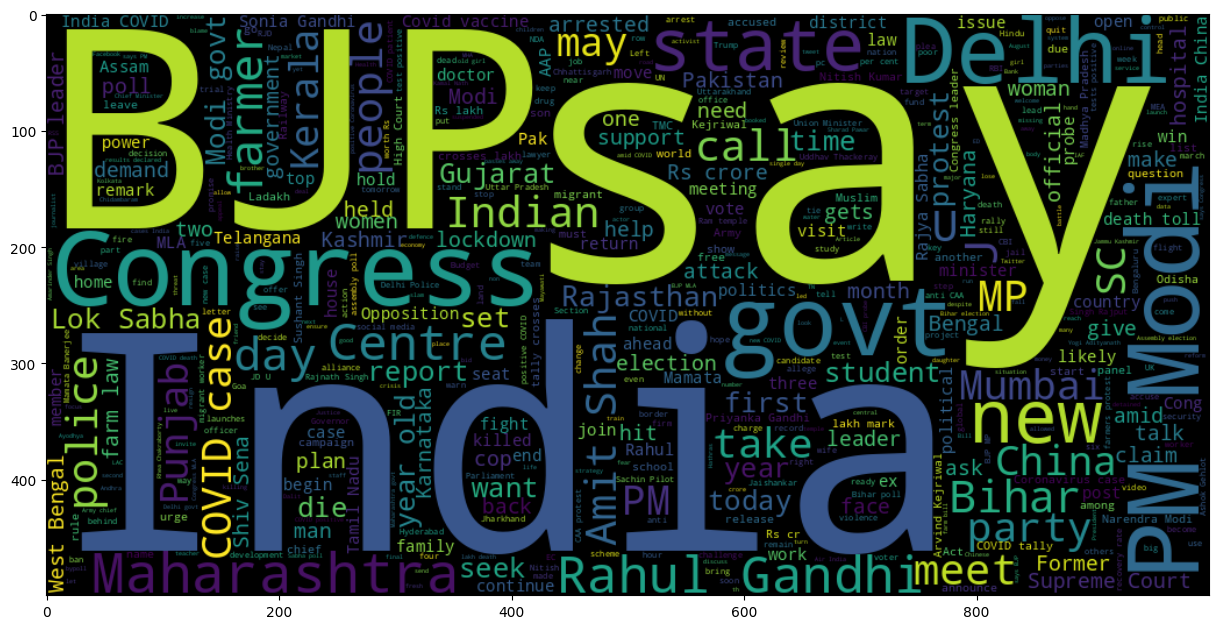

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target ==
                                                                                                             1].text))
plt.imshow(wc , interpolation = 'bilinear')

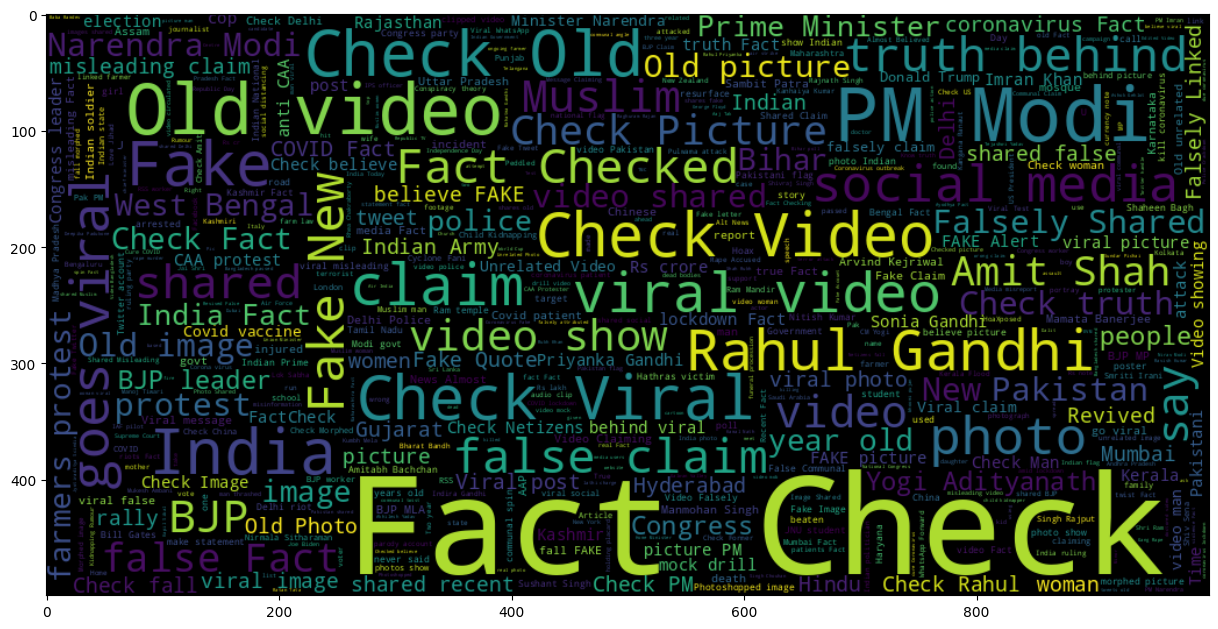

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

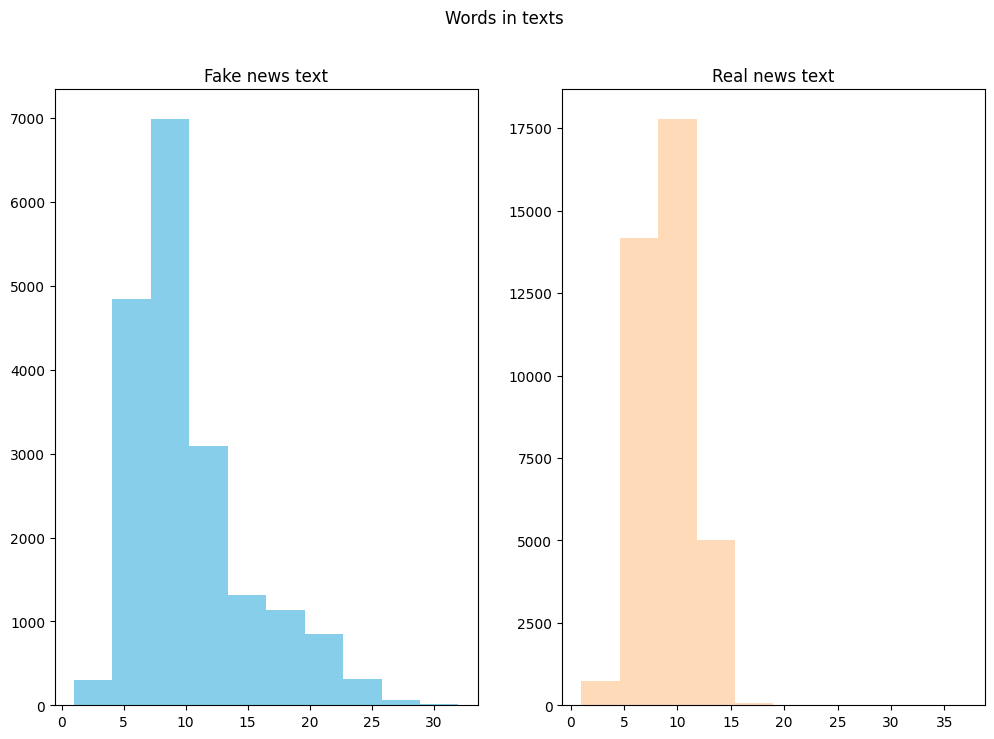

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [ ]:
texts = ' '.join(data['text'])

In [ ]:
string = texts.split(" ")

In [ ]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

       word  count
0   (Fact,)   9958
1  (Check,)   9045
2  (India,)   5122
3    (BJP,)   4680
4   (Modi,)   4518


ValueError: Names should be list-like for a MultiIndex

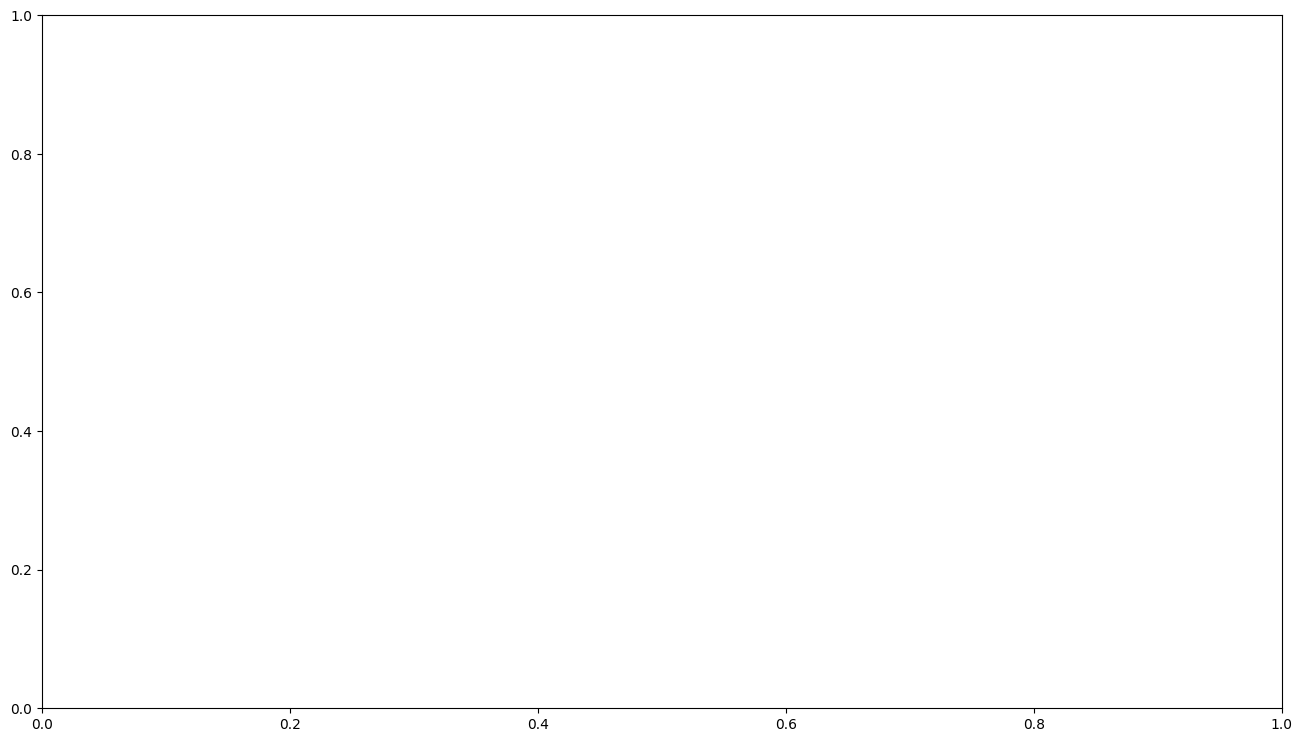

In [ ]:
draw_n_gram(string,1)

              word  count
0    (Fact, Check)   9011
1       (PM, Modi)   2328
2  (Rahul, Gandhi)   1228
3     (Amit, Shah)    739
4           (J, K)    711


ValueError: Names should be list-like for a MultiIndex

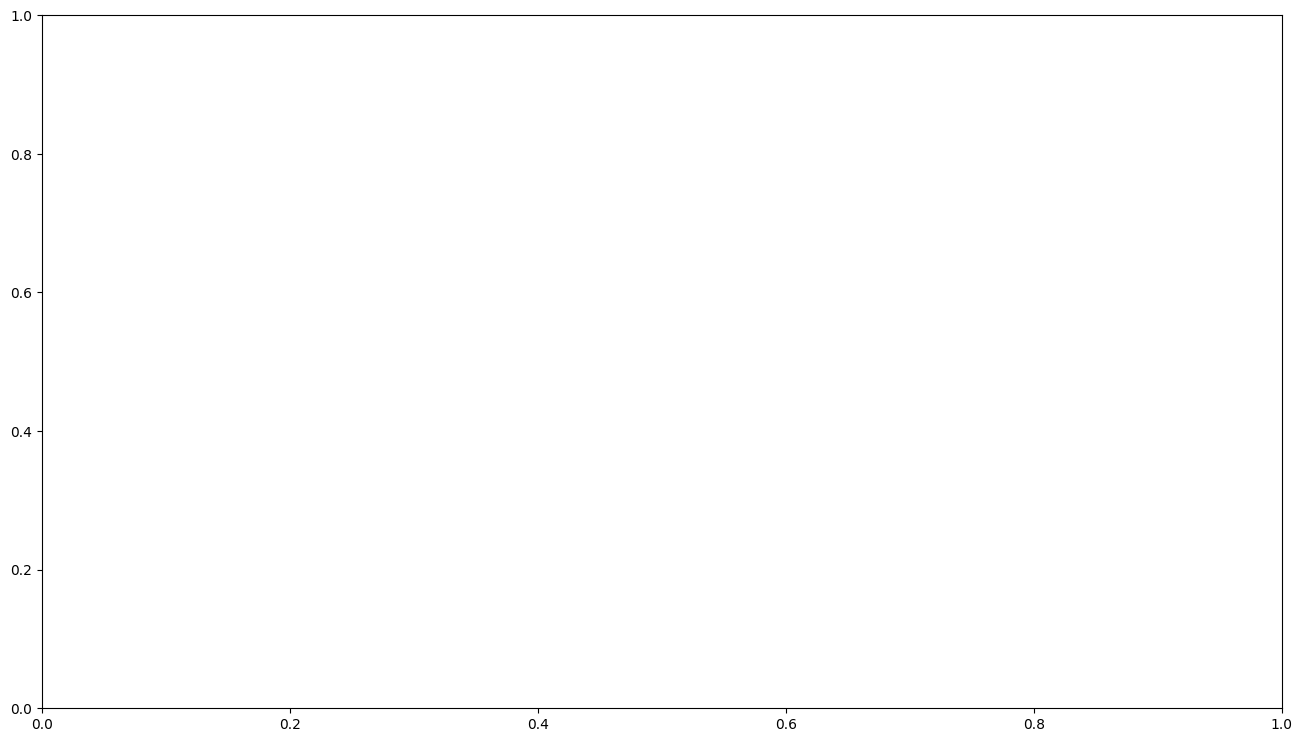

In [ ]:
draw_n_gram(string,2)

                       word  count
0        (Fact, Check, Old)    638
1      (Fact, Check, Viral)    429
2      (Fact, Check, Video)    373
3  (Sushant, Singh, Rajput)    189
4      (Fact, Check, video)    176


ValueError: Names should be list-like for a MultiIndex

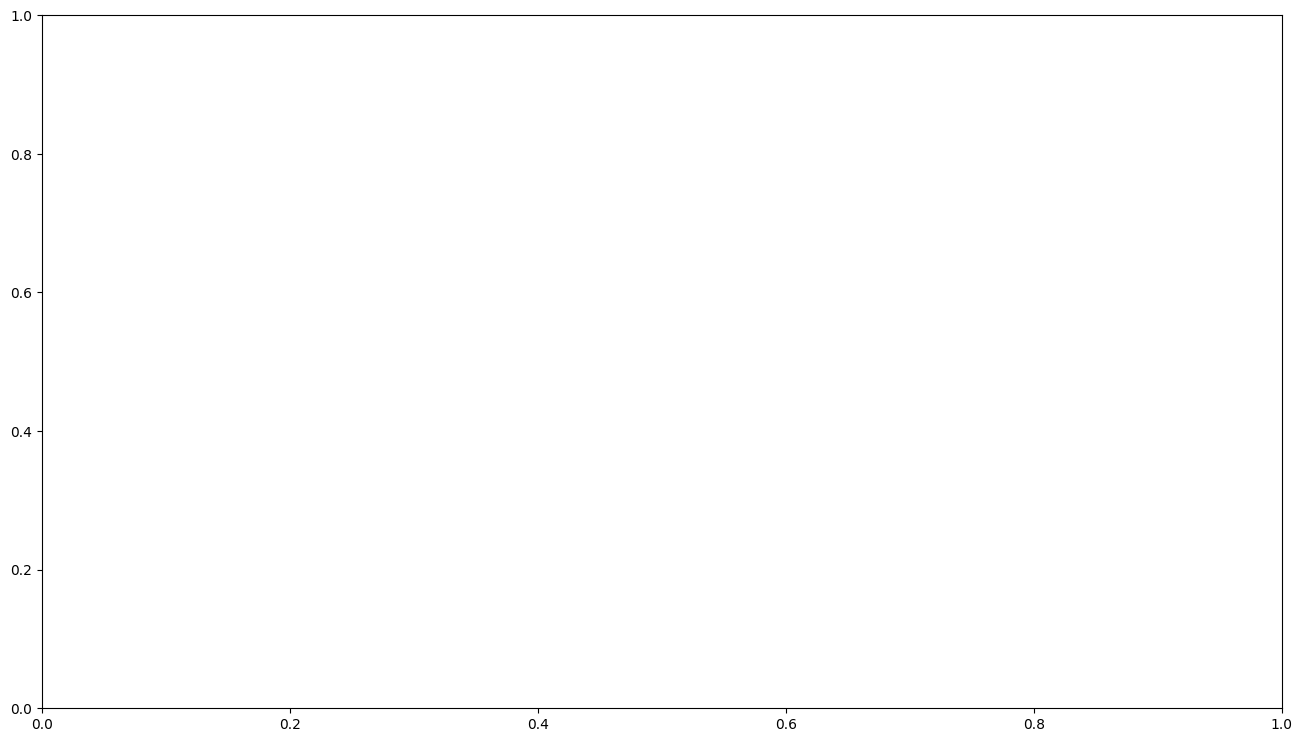

In [ ]:
draw_n_gram(string,3)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = data['text']
y = data['target']
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print('\n the total number of training data :',y_train.shape)


 the total number of training data : (39699,)


In [ ]:
print('\n the total number of testing data :',y_test.shape)


 the total number of testing data : (17015,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training the classifier & predicting on test data
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
# Classification metrics

print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9286511901263591


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.931942403761387


In [ ]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
# Classification metrics
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9342344989714957


In [ ]:
pip install textblob

In [ ]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

In [ ]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    times_of_india_news = []
    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter),datetime.today().strftime('%Y-%m-%d') + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    times_of_india_news.append(['Times of India',datetime.today().strftime('%Y-%m-%d'),litag.text])
    return times_of_india_news

In [ ]:
times_of_india_news = timesofindia()

1 2024-05-13.Does rising India deserve a ‘draconian’ law like PMLA?12 May 2024, 1643 hrs IST - https://timesofindia.indiatimes.com/india/who-gave-india-its-most-draconian-law-congress-or-bjp/articleshow/109804939.cms
2 2024-05-13.This is how much TCS CEO and COO earned in FY2024 - https://timesofindia.indiatimes.com/technology/tech-news/this-is-how-much-tcs-ceo-k-krithivasan-and-coo-ng-subramaniam-earned-in-fy2024/articleshow/110061371.cms
3 2024-05-13.Pak batter Rizwan's honest take on Virat warms hearts - https://timesofindia.indiatimes.com/sports/cricket/news/mohammad-rizwans-honest-admission-about-virat-kohli-warms-hearts-after-pakistans-win-over-ireland/articleshow/110069419.cms
4 2024-05-13.How trusted help, 63, spelled end for kind-hearted doctor - https://timesofindia.indiatimes.com/city/delhi/trusted-house-help-63-leads-to-tragic-end-for-kind-hearted-doctor/articleshow/110062706.cms
5 2024-05-13.Watch: Virat's leg-pulling act on Siraj - 'Bol mujhe bas...'  - https://timesofind

In [ ]:
pip install -U pip

In [ ]:
pip install --upgrade setuptools

In [ ]:
pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=e016ed506c73ab4195904a4140650740f1aebb14cfd00c720fc30318ab0ffce1
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
pip install "beautifulsoup4==4.9.1"

In [ ]:
pip install "dateparser==0.7.6"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.0/362.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install "requests==2.24.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 764.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requ

In [ ]:
pip install "feedparser==6.0.8"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: feedparser
    Found existing installation: feedparser 6.0.11
    Uninstalling feedparser-6.0.11:
      Successfully uninstalled feedparser-6.0.11


In [ ]:
pip install --no-deps pygooglenews

In [ ]:
from pygooglenews import GoogleNews
import json
import time


In [ ]:
def fetching_google_news():
    gn = GoogleNews()
    top = gn.top_news()

    entries = top["entries"]
    count = 0
    google_news = []
    for entry in entries:
        count = count + 1
        print( str(count) + ". " + entry["title"] + entry["published"])
        google_news.append(['Google News',entry["published"],entry["title"] ])
        time.sleep(0.25)
    return google_news

In [ ]:
google_news = fetching_google_news()

1. Michael Cohen: A challenging star witness in Donald Trump's hush money trial - The Associated PressSun, 12 May 2024 21:58:00 GMT
2. Putin replaces Russia’s defense minister with a civilian as Ukraine war rages and defense spending spirals - CNNMon, 13 May 2024 04:36:00 GMT
3. Duke University graduates walk out ahead of Jerry Seinfeld's commencement address - CBS NewsMon, 13 May 2024 00:10:36 GMT
4. Israel moves deeper into Rafah and fights Hamas militants regrouping in northern Gaza - The Associated PressMon, 13 May 2024 03:36:00 GMT
5. Sen. Lindsey Graham Suggests Nuking Gaza, Calls Hiroshima 'the Right Decision' - The Daily BeastSun, 12 May 2024 19:28:14 GMT
6. Spain Socialists win Catalan vote as separatists lose ground - BBC.comSun, 12 May 2024 23:35:36 GMT
7. Officials postpone explosive precision cuts of Key Bridge - WBAL TV BaltimoreMon, 13 May 2024 03:16:00 GMT
8. Trump gets nasty in New Jersey, dubs Biden a 'total moron' and DA Bragg 'fat Alvin' - The IndependentSun, 12 May

In [ ]:
news_content = []

In [ ]:
news_content+=times_of_india_news
news_content+= google_news
news_content_df = pd.DataFrame(news_content,columns = ['New_Site','Date' , 'Title'])

In [ ]:
news_content_df.head()

,New_Site,Date,Title
0,Times of India,2024-05-13,Does rising India deserve a ‘draconian’ law li...
1,Times of India,2024-05-13,This is how much TCS CEO and COO earned in FY2024
2,Times of India,2024-05-13,Pak batter Rizwan's honest take on Virat warms...
3,Times of India,2024-05-13,"How trusted help, 63, spelled end for kind-hea..."
4,Times of India,2024-05-13,Watch: Virat's leg-pulling act on Siraj - 'Bol...


In [ ]:
textblob_sentiment=[]
for index , row in news_content_df.iterrows():
    title = row['Title']
    txt= TextBlob(title)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([a,b])

In [ ]:
news_content_df['Text_blob_Polarity'] , news_content_df['Text_blob_Subjectivity'] = zip(*textblob_sentiment)

In [ ]:
news_content_df['Title_clean']=news_content_df['Title'].apply(remove_html)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_punctuations)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_characters)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_stopwords)

In [ ]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [ ]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [ ]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [ ]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [ ]:
news_content_df['Prediction_LR'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_RF'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_NB'].replace([1,0], ['True','Fake'],inplace=True)

In [ ]:
news_content_df.head()

,New_Site,Date,Title,Text_blob_Polarity,Text_blob_Subjectivity,Title_clean,Prediction_LR,Prediction_RF,Prediction_NB
0,Times of India,2024-05-13,Does rising India deserve a ‘draconian’ law li...,0.0,0.0,rising India deserve draconian law like PMLA M...,True,True,True
1,Times of India,2024-05-13,This is how much TCS CEO and COO earned in FY2024,0.2,0.2,much TCS CEO COO earned FY,True,True,True
2,Times of India,2024-05-13,Pak batter Rizwan's honest take on Virat warms...,0.6,0.9,Pak batter Rizwan honest take Virat warms hearts,True,True,True
3,Times of India,2024-05-13,"How trusted help, 63, spelled end for kind-hea...",0.0,0.0,trusted help spelled end kind hearted doctor,True,True,True
4,Times of India,2024-05-13,Watch: Virat's leg-pulling act on Siraj - 'Bol...,0.0,0.0,Watch Virat leg pulling act Siraj Bol mujhe bas,True,True,True


In [ ]:
news_content_df.to_excel('Result.xlsx')

In [ ]:
def real_time_prediction(news):
  news_transformed = td.transform([news]).toarray()
  Prediction_LR = classifier_lr.predict(news_transformed)
  Prediction_RF = classifier_rf.predict(news_transformed)
  Prediction_NB = classifier_nb.predict(news_transformed)
  Prediction_LR = ['Real✅'  if i == 1 else 'False❌' for i in Prediction_LR ]
  print(f"Based on Logistic Regression model this News is ::{Prediction_LR[0]}")
  Prediction_RF = ['Real✅'  if i == 1 else 'False❌' for i in Prediction_RF ]
  print(f"Based on  Random Forest Model this News is ::{Prediction_RF[0]}")
  Prediction_NB = ['Real✅'  if i == 1 else 'False❌' for i in Prediction_NB ]
  print(f"Based on Naive Bayes model this News is :: {Prediction_NB[0]} ")

In [ ]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)

Based on Logistic Regression model this News is ::False❌
Based on  Random Forest Model this News is ::False❌
Based on Naive Bayes model this News is :: False❌ 
